## Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

pd.set_option("display.max_rows", None, "display.max_columns", None)

## Import Data

In [2]:
df = pd.read_csv("loan_data_2007_2014.csv")

C:\Users\Fidya Almira Suheri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Preparation

In [3]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

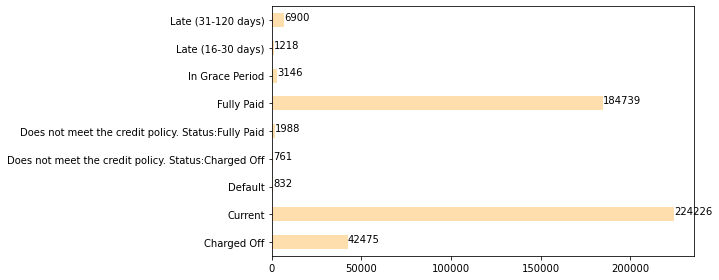

In [4]:
#create barh 
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
#df['loan_status'].value_counts().sort_index().plot.barh()
df['loan_status'].value_counts().sort_index().plot(kind='barh', color='navajowhite')
for index, value in enumerate(df['loan_status'].value_counts().sort_index()):
    plt.text(value,index,str(value))

*kolom loan_status akan dijadikan target, sehingga akan dideklarasikan variabel baru yaitu x dan y sebagai target dan feature*

In [5]:
df['target'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)

df.drop(columns = ['loan_status'], inplace = True)
X = df.drop('target', axis = 1)
y = df['target']

<AxesSubplot:>

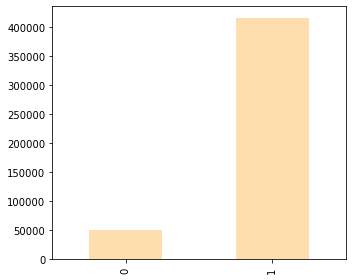

In [6]:
#create bar chart
plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True
df['target'].value_counts().sort_index().plot(kind='bar', color='navajowhite')

In [7]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [8]:
df.shape

(466285, 75)

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
     

##### Memeriksa Missing Value

In [10]:
MissingValue = df.isnull().sum()
MissingValue = MissingValue[MissingValue>0]
print('terdapat', MissingValue.count(), 'feature yang memiliki missing value')

terdapat 40 feature yang memiliki missing value


In [11]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

##### Memeriksa Kolom yang terdapat lebih dari 70% Missing Value karena akan menimbulkan ketidakakuratan

In [12]:
MissingValueMean = df.isnull().mean()
DropMissingValue = MissingValueMean[MissingValueMean>0.7]
DropMissingValue

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

##### Menghapus Kolom dengan >70% Missing Value

In [13]:
df = df.drop(columns = DropMissingValue.index)

In [14]:
df = df.drop(columns = 'Unnamed: 0')

In [15]:
df.shape

(466285, 54)

##### Analisa Features

In [16]:
MissingValue = df.isnull().sum()>0
MissingValue.index

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'target'],
      dtype='object')

*Perhatikan bahwa feature seperti id, member_id, url, title, zip_code, policy_code dan emp_title informasi yang dapat diabaikan dalam membangun model. Selain itu, feature seperti collection_recovery_fee, next_pymnt_d, title , total_rec_prncp, total_rec_late_fee, recoveries dapat diabaikan karena merupakan variabel yang terjadi di masa depan. Feature sub_grade juga dapat diabaikan karena diasumsikan dapat diwakilkan melalui feature grade*

In [17]:
df = df.drop(['sub_grade','policy_code','id','member_id','url','title','zip_code','emp_title', 
        'collection_recovery_fee','next_pymnt_d','total_rec_prncp',
         'total_rec_late_fee', 'recoveries'], axis='columns')

In [18]:
df = df.dropna(axis=0)


In [19]:
df.shape

(181686, 41)

##### karena akan digunakan model logistic regression, maka feature yang memiliki korelasi kuat akan dihapus atau drop

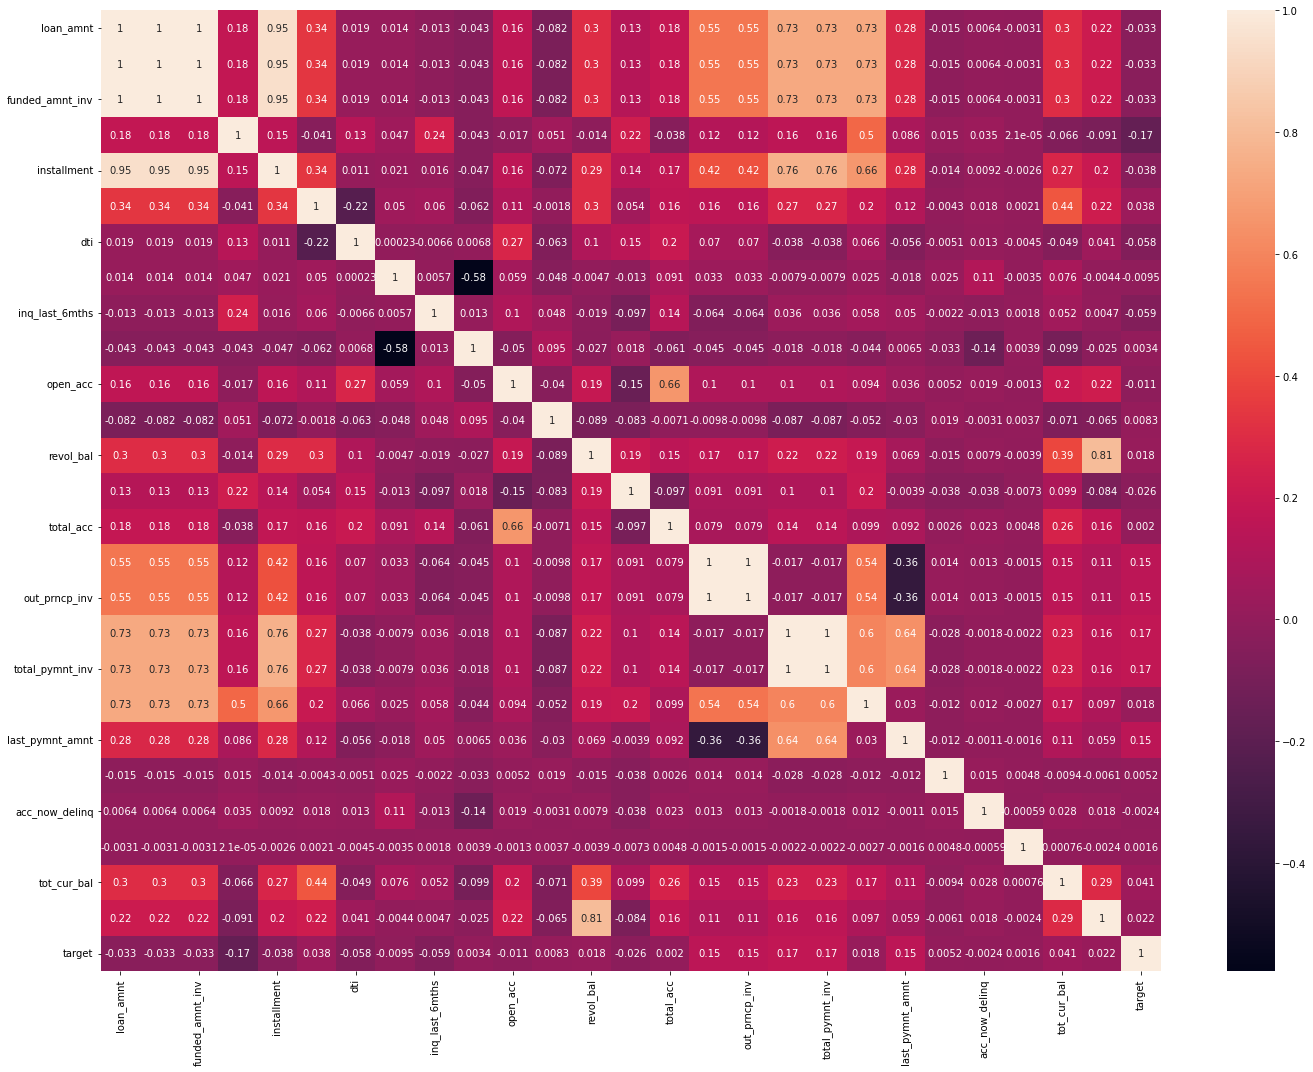

In [20]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={'size':10})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.show()

*terlihat bahwa feature seperti 'loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment' ,'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rev_hi_lim', 'open_acc', 'total_acc' memiliki korelasi yang sangat kuat (>80%)*

In [21]:
df = df.drop([ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment' ,'revol_bal', 
              'out_prncp_inv', 'total_pymnt_inv', 'total_acc'], axis='columns')

In [22]:
df.shape

(181686, 33)

*Memisahkan *

In [23]:
df.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 181686 non-null  object
 1   grade                181686 non-null  object
 2   emp_length           181686 non-null  object
 3   home_ownership       181686 non-null  object
 4   verification_status  181686 non-null  object
 5   issue_d              181686 non-null  object
 6   pymnt_plan           181686 non-null  object
 7   purpose              181686 non-null  object
 8   addr_state           181686 non-null  object
 9   earliest_cr_line     181686 non-null  object
 10  initial_list_status  181686 non-null  object
 11  last_pymnt_d         181686 non-null  object
 12  last_credit_pull_d   181686 non-null  object
 13  application_type     181686 non-null  object
dtypes: object(14)
memory usage: 20.8+ MB


In [24]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    181686 non-null  float64
 1   annual_inc                  181686 non-null  float64
 2   dti                         181686 non-null  float64
 3   delinq_2yrs                 181686 non-null  float64
 4   inq_last_6mths              181686 non-null  float64
 5   mths_since_last_delinq      181686 non-null  float64
 6   open_acc                    181686 non-null  float64
 7   pub_rec                     181686 non-null  float64
 8   revol_util                  181686 non-null  float64
 9   out_prncp                   181686 non-null  float64
 10  total_pymnt                 181686 non-null  float64
 11  total_rec_int               181686 non-null  float64
 12  last_pymnt_amnt             181686 non-null  float64
 13  collection

In [25]:
df.select_dtypes(exclude='number').head()

,term,grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
42537,36 months,A,10+ years,MORTGAGE,Not Verified,Dec-13,n,debt_consolidation,CT,Mar-94,w,Jan-16,Jan-16,INDIVIDUAL
42538,36 months,B,10+ years,RENT,Source Verified,Dec-13,n,debt_consolidation,NM,Oct-98,w,Sep-15,Jan-16,INDIVIDUAL
42539,36 months,A,2 years,MORTGAGE,Not Verified,Dec-13,n,debt_consolidation,FL,Mar-98,w,Jan-16,Jan-16,INDIVIDUAL
42541,36 months,B,4 years,RENT,Not Verified,Dec-13,n,debt_consolidation,NC,Jun-88,f,Jan-16,Jan-16,INDIVIDUAL
42543,36 months,B,7 years,MORTGAGE,Not Verified,Dec-13,n,debt_consolidation,MA,Oct-89,f,Jan-16,Jan-16,INDIVIDUAL


Features Categorical seperti 'term' , 'emp_length', 'issue_d' , 'earliest_cr_line' , 'last_pymnt_d' , dan 'last_credit_pull_d' akan diconvert menjadi numerik

In [26]:
df['emp_length'].value_counts()

10+ years    69102
2 years      15615
3 years      14172
< 1 year     12812
5 years      11434
1 year       10905
7 years      10601
4 years      10380
6 years      10121
8 years       9191
9 years       7353
Name: emp_length, dtype: int64

In [27]:
#BERIKUT MERUPAKAN FUNGSI UNTUK MENGKONVERSI FEATURES TERSEBUT MENJADI NUMERIK

#Features : 'term'
def convert_term(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
#Features : 'emp_length'    
def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)

#Features :  'issue_d' , 'earliest_cr_line' , 'last_pymnt_d' , dan 'last_credit_pull_d'
def date_convert(df, column):
    # store current month
    today_date = pd.to_datetime('2022-06-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

In [28]:
convert_term(df, 'term')
emp_length_convert(df, 'emp_length')
date_convert(df, 'issue_d')
date_convert(df, 'earliest_cr_line')
date_convert(df, 'last_pymnt_d')
date_convert(df, 'last_credit_pull_d')

C:\Users\FIDYAA~1\AppData\Local\Temp/ipykernel_90968/1133070268.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [29]:
df.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
42537,36,6.62,A,10,MORTGAGE,105000.0,Not Verified,n,debt_consolidation,CT,14.05,0.0,1.0,43.0,12.0,0.0,21.6,w,4266.62,8842.80,1109.42,368.45,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1,102.0,339.0,77.0,77.0
42538,36,13.53,B,10,RENT,40000.0,Source Verified,n,debt_consolidation,NM,16.94,0.0,0.0,53.0,7.0,2.0,68.8,w,0.00,13359.77,1359.78,119.17,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,102.0,284.0,81.0,77.0
42539,36,8.90,A,2,MORTGAGE,63000.0,Not Verified,n,debt_consolidation,FL,16.51,0.0,0.0,34.0,8.0,0.0,74.2,w,5449.27,11431.20,1880.47,476.30,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1,102.0,291.0,77.0,77.0
42541,36,12.85,B,4,RENT,88000.0,Not Verified,n,debt_consolidation,NC,10.02,1.0,0.0,16.0,6.0,1.0,81.9,f,5274.10,11296.94,2571.04,470.71,0.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,1,102.0,408.0,77.0,77.0
42543,36,9.67,B,7,MORTGAGE,102000.0,Not Verified,n,debt_consolidation,MA,15.55,2.0,0.0,11.0,9.0,0.0,44.4,f,3659.12,7706.81,1365.93,321.13,0.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,1,102.0,392.0,77.0,77.0


In [30]:
df.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                181686 non-null  object
 1   home_ownership       181686 non-null  object
 2   verification_status  181686 non-null  object
 3   pymnt_plan           181686 non-null  object
 4   purpose              181686 non-null  object
 5   addr_state           181686 non-null  object
 6   initial_list_status  181686 non-null  object
 7   application_type     181686 non-null  object
dtypes: object(8)
memory usage: 12.5+ MB


In [31]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   emp_length                     181686 non-null  int64  
 3   annual_inc                     181686 non-null  float64
 4   dti                            181686 non-null  float64
 5   delinq_2yrs                    181686 non-null  float64
 6   inq_last_6mths                 181686 non-null  float64
 7   mths_since_last_delinq         181686 non-null  float64
 8   open_acc                       181686 non-null  float64
 9   pub_rec                        181686 non-null  float64
 10  revol_util                     181686 non-null  float64
 11  out_prncp                      181686 non-null  float64
 12  total_pymnt               

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   grade                          181686 non-null  object 
 3   emp_length                     181686 non-null  int64  
 4   home_ownership                 181686 non-null  object 
 5   annual_inc                     181686 non-null  float64
 6   verification_status            181686 non-null  object 
 7   pymnt_plan                     181686 non-null  object 
 8   purpose                        181686 non-null  object 
 9   addr_state                     181686 non-null  object 
 10  dti                            181686 non-null  float64
 11  delinq_2yrs                    181686 non-null  float64
 12  inq_last_6mths            

In [33]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

columns = df.select_dtypes(exclude='object').columns

print("Banyak Pencilan:")
for i in columns:
    outlier_datapoints = detect_outlier(df[i])
    print(i,":",len(outlier_datapoints),'dengan persentase',round(len(outlier_datapoints)/len(df[i])*100,3), '%')

Banyak Pencilan:
term : 0 dengan persentase 0.0 %
int_rate : 0 dengan persentase 0.0 %
emp_length : 0 dengan persentase 0.0 %
annual_inc : 1657 dengan persentase 0.912 %
dti : 0 dengan persentase 0.0 %
delinq_2yrs : 4543 dengan persentase 2.5 %
inq_last_6mths : 1475 dengan persentase 0.812 %
mths_since_last_delinq : 76 dengan persentase 0.042 %
open_acc : 2219 dengan persentase 1.221 %
pub_rec : 4685 dengan persentase 2.579 %
revol_util : 16 dengan persentase 0.009 %
out_prncp : 2469 dengan persentase 1.359 %
total_pymnt : 3524 dengan persentase 1.94 %
total_rec_int : 3705 dengan persentase 2.039 %
last_pymnt_amnt : 4868 dengan persentase 2.679 %
collections_12_mths_ex_med : 2744 dengan persentase 1.51 %
acc_now_delinq : 1653 dengan persentase 0.91 %
tot_coll_amt : 22 dengan persentase 0.012 %
tot_cur_bal : 2389 dengan persentase 1.315 %
total_rev_hi_lim : 1020 dengan persentase 0.561 %
target : 17824 dengan persentase 9.81 %
mths_since_issue_d : 0 dengan persentase 0.0 %
mths_since_ea

In [34]:
df.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
42537,36,6.62,A,10,MORTGAGE,105000.0,Not Verified,n,debt_consolidation,CT,14.05,0.0,1.0,43.0,12.0,0.0,21.6,w,4266.62,8842.80,1109.42,368.45,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1,102.0,339.0,77.0,77.0
42538,36,13.53,B,10,RENT,40000.0,Source Verified,n,debt_consolidation,NM,16.94,0.0,0.0,53.0,7.0,2.0,68.8,w,0.00,13359.77,1359.78,119.17,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,102.0,284.0,81.0,77.0
42539,36,8.90,A,2,MORTGAGE,63000.0,Not Verified,n,debt_consolidation,FL,16.51,0.0,0.0,34.0,8.0,0.0,74.2,w,5449.27,11431.20,1880.47,476.30,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1,102.0,291.0,77.0,77.0
42541,36,12.85,B,4,RENT,88000.0,Not Verified,n,debt_consolidation,NC,10.02,1.0,0.0,16.0,6.0,1.0,81.9,f,5274.10,11296.94,2571.04,470.71,0.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,1,102.0,408.0,77.0,77.0
42543,36,9.67,B,7,MORTGAGE,102000.0,Not Verified,n,debt_consolidation,MA,15.55,2.0,0.0,11.0,9.0,0.0,44.4,f,3659.12,7706.81,1365.93,321.13,0.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,1,102.0,392.0,77.0,77.0


#### Menghitung Weight of Evidence dan Information Value 

In [35]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [36]:
newdf = df
iv, woe = iv_woe(newdf, target='target', bins=20)

In [37]:
iv[iv['IV']>0.5]

,Variable,IV
0,out_prncp,0.703375
0,total_pymnt,0.515794
0,last_pymnt_amnt,1.491828
0,mths_since_last_pymnt_d,2.331187


In [38]:
iv[iv['IV']< 0.02]

,Variable,IV
0,emp_length,0.007174
0,home_ownership,0.017952
0,pymnt_plan,0.000309
0,addr_state,0.010291
0,delinq_2yrs,0.001039
0,mths_since_last_delinq,0.002487
0,open_acc,0.004499
0,pub_rec,0.000504
0,revol_util,0.008858
0,initial_list_status,0.011513


* feature yang memiliki iv diatas 0.5 memiliki kecurigaan karena "too good to be true". Dengan demikian, feature seperti 'last_pymnt_amnt', dan 'mths_since_last_pymnt_d' akan dihapus
* feature yang memiliki iv dibawah 0.02 akan dihapus karena tidak berguna untuk pemodelan, seperti 'emp_length' ,  ,'pymnt_plan', 'delinq_2yrs' ,'mths_since_last_delinq' , 'open_acc' , 'pub_rec' , 'revol_util' , 'collections_12_mths_ex_med' , 'application_type' , 'acc_now_delinq' , 'tot_coll_amt' , 

In [39]:
newdf = newdf.drop([ 'last_pymnt_amnt', 'mths_since_last_pymnt_d' , 
                    'pymnt_plan' , 'emp_length' , 'pymnt_plan','delinq_2yrs' ,
                    'mths_since_last_delinq' ,'open_acc' , 'pub_rec' , 'revol_util'  , 
                    'collections_12_mths_ex_med' , 'application_type' ,
                    'acc_now_delinq' , 'tot_coll_amt'], axis=1)

In [40]:
newdf.shape

(181686, 20)

In [41]:
newdf.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                181686 non-null  object
 1   home_ownership       181686 non-null  object
 2   verification_status  181686 non-null  object
 3   purpose              181686 non-null  object
 4   addr_state           181686 non-null  object
 5   initial_list_status  181686 non-null  object
dtypes: object(6)
memory usage: 9.7+ MB


In [42]:
newdf.select_dtypes(exclude='number').columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [43]:
df_dummies = [pd.get_dummies(df['grade'], prefix='grade', prefix_sep=':'),
               pd.get_dummies(df['home_ownership'], prefix='home_ownership', prefix_sep=':'),
               pd.get_dummies(df['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(df['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(df['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                               
               ]

categorical_dummies = pd.concat(df_dummies, axis=1)
categorical_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
42537,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42538,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42539,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42541,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42543,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
newdf = pd.concat([newdf, categorical_dummies], axis=1)

In [45]:
newdf.head()

,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,initial_list_status,out_prncp,total_pymnt,total_rec_int,tot_cur_bal,total_rev_hi_lim,target,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_credit_pull_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
42537,36,6.62,A,MORTGAGE,105000.0,Not Verified,debt_consolidation,CT,14.05,1.0,w,4266.62,8842.80,1109.42,267646.0,61100.0,1,102.0,339.0,77.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42538,36,13.53,B,RENT,40000.0,Source Verified,debt_consolidation,NM,16.94,0.0,w,0.00,13359.77,1359.78,13605.0,8100.0,1,102.0,284.0,77.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42539,36,8.90,A,MORTGAGE,63000.0,Not Verified,debt_consolidation,FL,16.51,0.0,w,5449.27,11431.20,1880.47,272492.0,15400.0,1,102.0,291.0,77.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42541,36,12.85,B,RENT,88000.0,Not Verified,debt_consolidation,NC,10.02,0.0,f,5274.10,11296.94,2571.04,17672.0,4500.0,1,102.0,408.0,77.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42543,36,9.67,B,MORTGAGE,102000.0,Not Verified,debt_consolidation,MA,15.55,0.0,f,3659.12,7706.81,1365.93,39143.0,22300.0,1,102.0,392.0,77.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
newdf2 = newdf

In [47]:
newdf2 = newdf2.drop(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'], axis =1)

In [48]:
newdf2.head()

,term,int_rate,annual_inc,dti,inq_last_6mths,out_prncp,total_pymnt,total_rec_int,tot_cur_bal,total_rev_hi_lim,target,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_credit_pull_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
42537,36,6.62,105000.0,14.05,1.0,4266.62,8842.80,1109.42,267646.0,61100.0,1,102.0,339.0,77.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42538,36,13.53,40000.0,16.94,0.0,0.00,13359.77,1359.78,13605.0,8100.0,1,102.0,284.0,77.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42539,36,8.90,63000.0,16.51,0.0,5449.27,11431.20,1880.47,272492.0,15400.0,1,102.0,291.0,77.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42541,36,12.85,88000.0,10.02,0.0,5274.10,11296.94,2571.04,17672.0,4500.0,1,102.0,408.0,77.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42543,36,9.67,102000.0,15.55,0.0,3659.12,7706.81,1365.93,39143.0,22300.0,1,102.0,392.0,77.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
newdf2.shape

(181686, 92)

## Model Logistic Regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

In [51]:
#Splitting X dan y
X = newdf2.drop('target', axis = 1)
y = newdf2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
X_train.shape

(145348, 91)

In [53]:
#dealing with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)

In [54]:
X_train_o.head()

,term,int_rate,annual_inc,dti,inq_last_6mths,out_prncp,total_pymnt,total_rec_int,tot_cur_bal,total_rev_hi_lim,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_credit_pull_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,60,15.31,40000.0,26.07,1.0,11215.00,8438.25,3653.25,121507.0,23000.0,98.0,300.0,77.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,36,14.47,99000.0,9.26,0.0,6175.36,11870.30,3045.66,26937.0,14700.0,100.0,311.0,77.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,60,21.98,80000.0,19.77,1.0,0.00,6783.40,3892.34,102390.0,5300.0,110.0,273.0,77.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,60,22.95,72000.0,21.07,4.0,16898.30,28236.18,15634.48,45199.0,23700.0,111.0,212.0,77.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,36,7.69,80000.0,2.96,0.0,3894.30,3712.12,606.42,11353.0,8700.0,95.0,371.0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
#Call the classifier
model = LogisticRegression()
#Fit the classifier to the training data
model = model.fit(X_train,y_train)

In [56]:
y_test.shape

(36338,)

Training Accuracy :  0.9262390951371879
Testing Accuracy :  0.9248995541857009
\Confusion matrix:
[[  911  2633]
 [   96 32698]]
\Classification report:
              precision    recall  f1-score   support

           0       0.90      0.26      0.40      3544
           1       0.93      1.00      0.96     32794

    accuracy                           0.92     36338
   macro avg       0.92      0.63      0.68     36338
weighted avg       0.92      0.92      0.91     36338



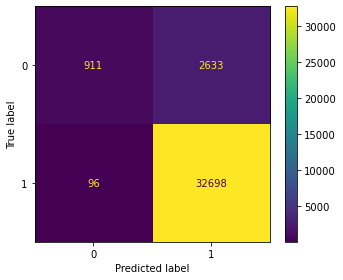

In [57]:
#apply the classifier/model to the test data
y_pred = model.predict(X_test)
y_pred.shape

#evaluating the model
print('Training Accuracy : ', model.score(X_train, y_train))
print('Testing Accuracy : ', model.score(X_test, y_test))

#confusion matrix
print('\Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm, display_labels= model.classes_).plot()    

#classification report
print('\Classification report:')
cm = classification_report(y_test, y_pred)
print(cm)


In [58]:
# saving model 
import pickle
filename = 'CreditRiskModel.sav'
pickle.dump(model, open(filename, 'wb'))